[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/Singer/surf_tense_mcmc.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Singer/surf_tens_mcmc.ipynb)

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install atmos-cloud-sim-uj-utils
    from atmos_cloud_sim_uj_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
%env NUMBA_DISABLE_JIT=1

env: NUMBA_DISABLE_JIT=1


In [3]:
from matplotlib import pylab
import numpy as np
sys.path.append("/Users/claresinger/Research/PySDM/")
print(sys.path)
from PySDM import Formulae
from PySDM.physics import si, constants as const
from atmos_cloud_sim_uj_utils import show_plot
from PySDM_examples.Singer.aerosol import AerosolBetaCary

['/Users/claresinger/Research/PySDM-examples/PySDM_examples/Singer', '/Users/claresinger/anaconda3/envs/pysdm-env/lib/python38.zip', '/Users/claresinger/anaconda3/envs/pysdm-env/lib/python3.8', '/Users/claresinger/anaconda3/envs/pysdm-env/lib/python3.8/lib-dynload', '', '/Users/claresinger/anaconda3/envs/pysdm-env/lib/python3.8/site-packages', '/Users/claresinger/Research/PySDM-examples', '/Users/claresinger/anaconda3/envs/pysdm-env/lib/python3.8/site-packages/IPython/extensions', '/Users/claresinger/.ipython', '/Users/claresinger/Research/PySDM/']


In [4]:
from PySDM.physics.surface_tension import compressed_film_ovadnevaite
compressed_film_ovadnevaite.sgm_org = 40.0 * si.mN / si.m
compressed_film_ovadnevaite.delta_min = 0.3 * si.nm

In [5]:
formulae_ovad = Formulae(surface_tension='CompressedFilmOvadnevaite')
label = 'Ovad'

cases = {
    'Beta Caryophyllene': AerosolBetaCary()
}

T = 300 * si.K

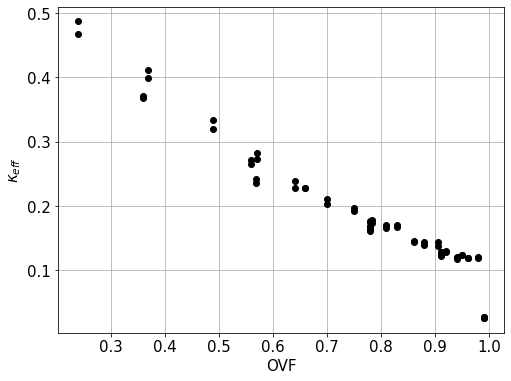

In [50]:
ds = np.loadtxt("bcary.csv",skiprows=1,delimiter=",")
r_dry = ds[:,0]*1e-9
ovf = np.minimum(ds[:,1], 0.99)
kappa_eff = ds[:,2]

datay = kappa_eff
errory = datay*0.1

args = [T, r_dry, ovf]

pylab.figure(figsize=(8,6))
pylab.plot(ovf, kappa_eff, 'ko')
pylab.xlabel("OVF")
pylab.ylabel("$\kappa_{eff}$")
pylab.rcParams.update({'font.size':15})
pylab.grid()
pylab.show()

[44.81707185  0.60653066]


/Users/claresinger/Research/PySDM/PySDM/physics/hygroscopicity/kappa_koehler_leading_terms.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  (2 * sgm / const.Rv / T / const.rho_w) / r -
/Users/claresinger/Research/PySDM/PySDM/physics/hygroscopicity/kappa_koehler_leading_terms.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  kp * rd3 / power(r, const.THREE)
/Users/claresinger/Research/PySDM/PySDM/physics/hygroscopicity/kappa_koehler_leading_terms.py:9: RuntimeWarning: invalid value encountered in double_scalars
  1 +


[-0.06842753  0.55088141]
[34.7687848  1.7347814]


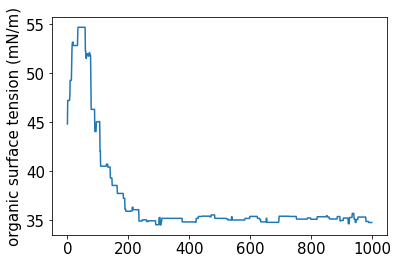

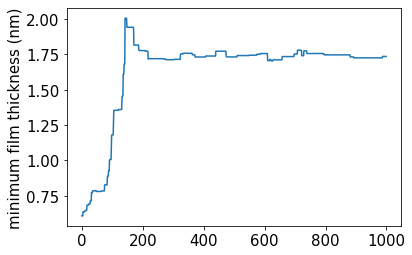

In [51]:
from importlib import reload
import kappa_mcmc
reload(kappa_mcmc)
from kappa_mcmc import param_transform, get_model, MCMC

#params = [0.22, -1.2]
params = [0.5, -0.5]
stepsize = [0.1,0.1]
print(param_transform(params))

n_steps = 1000
param_chain, accept_chain, chi2_chain = MCMC(params, stepsize, args, datay, errory, n_steps)

p = param_transform(param_chain)
print(param_chain[:,-1])
print(p[:,-1])
pylab.plot(p[0,:])
pylab.ylabel("organic surface tension (mN/m)")
pylab.show()
pylab.plot(p[1,:])
pylab.ylabel("minimum film thickness (nm)")
pylab.show()

### Surface tension

[44.81707185  0.60653066]
[34.7687848  1.7347814]


/Users/claresinger/Research/PySDM/PySDM/physics/hygroscopicity/kappa_koehler_leading_terms.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  (2 * sgm / const.Rv / T / const.rho_w) / r -
/Users/claresinger/Research/PySDM/PySDM/physics/hygroscopicity/kappa_koehler_leading_terms.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  kp * rd3 / power(r, const.THREE)
/Users/claresinger/Research/PySDM/PySDM/physics/hygroscopicity/kappa_koehler_leading_terms.py:9: RuntimeWarning: invalid value encountered in double_scalars
  1 +
/Users/claresinger/Research/PySDM/PySDM/physics/hygroscopicity/kappa_koehler_leading_terms.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  (2 * sgm / const.Rv / T / const.rho_w) / r -
/Users/claresinger/Research/PySDM/PySDM/physics/hygroscopicity/kappa_koehler_leading_terms.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  kp * rd3 / power(r, const.THREE)
/Users/claresinger/Research/PySDM/PyS

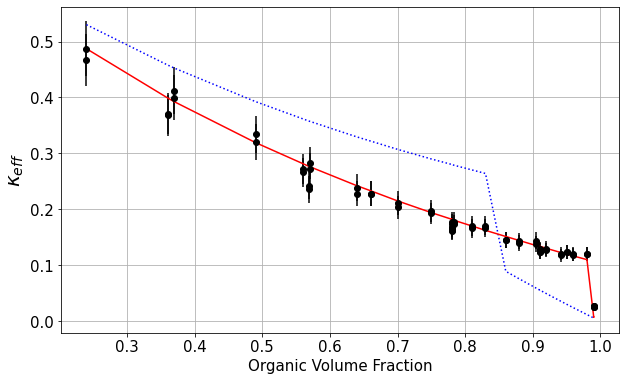

[[0.24       0.4871     0.5300292  0.48713269]
 [0.24       0.4674     0.5300292  0.48713269]
 [0.36       0.371      0.45799473 0.39918134]
 [0.36       0.368      0.45799473 0.39918134]
 [0.37       0.3995     0.45243403 0.39238349]
 [0.37       0.4124     0.45243403 0.39238349]
 [0.49       0.334      0.39259519 0.31936335]
 [0.49       0.32       0.39259519 0.31936335]
 [0.56       0.266      0.36178058 0.28173738]
 [0.56       0.272      0.36178058 0.28173738]
 [0.569      0.2357     0.35780276 0.27682416]
 [0.569      0.2425     0.35780276 0.27682416]
 [0.57       0.273      0.35745176 0.27641802]
 [0.57       0.2827     0.35745176 0.27641802]
 [0.64       0.239      0.32946241 0.24222238]
 [0.64       0.228      0.32946241 0.24222238]
 [0.66       0.228      0.32214254 0.23338118]
 [0.66       0.228      0.32214254 0.23338118]
 [0.7        0.204      0.30730731 0.21517979]
 [0.7        0.211      0.30730731 0.21517979]
 [0.75       0.1977     0.2900655  0.19417596]
 [0.75       

In [66]:
reload(kappa_mcmc)
from kappa_mcmc import param_transform, negSS
from scipy.optimize import minimize_scalar, minimize

dat = np.zeros((len(ovf),4))

c = AerosolBetaCary(ovf)
f_org = c.aerosol_modes_per_cc[0]['f_org']
kappa = c.aerosol_modes_per_cc[0]['kappa']['Ovad']

pylab.figure(figsize=(10,6))

# before
p = param_transform(param_chain[:,0])
print(p)

compressed_film_ovadnevaite.sgm_org = p[0] * si.mN / si.m
compressed_film_ovadnevaite.delta_min = p[1] * si.nm
formulae_1 = Formulae(surface_tension='CompressedFilmOvadnevaite')
Scrit, rcrit = np.zeros(len(r_dry)), np.zeros(len(r_dry))
for i, rd in enumerate(r_dry):
    a = [formulae_1, T, r_dry[i], kappa[i], f_org[i]]
    res = minimize_scalar(negSS, args=a)
    Scrit[i], rcrit[i] = -1*res.fun, res.x

kap_eff = (2 * rcrit**2) / (3 * r_dry**3 * const.Rv * T * const.rho_w) * const.sgm_w
s = np.argsort(ovf)
dat[:,0] = ovf[s]
dat[:,2] = kap_eff[s]
pylab.plot(ovf[s], kap_eff[s], 'b:', label="before")

# after
p = param_transform(param_chain[:,-1])
print(p)

compressed_film_ovadnevaite.sgm_org = p[0] * si.mN / si.m
compressed_film_ovadnevaite.delta_min = p[1] * si.nm
formulae_2 = Formulae(surface_tension='CompressedFilmOvadnevaite')
Scrit, rcrit = np.zeros(len(r_dry)), np.zeros(len(r_dry))
for i, rd in enumerate(r_dry):
    a = [formulae_2, T, r_dry[i], kappa[i], f_org[i]]
    res = minimize_scalar(negSS, args=a)
    Scrit[i], rcrit[i] = -1*res.fun, res.x

kap_eff = (2 * rcrit**2) / (3 * r_dry**3 * const.Rv * T * const.rho_w) * const.sgm_w
s = np.argsort(ovf)
dat[:,3] = kap_eff[s]
pylab.plot(ovf[s], kap_eff[s], 'r-', label="after")

# data
s = np.argsort(ovf)
dat[:,1] = kappa_eff[s]
pylab.errorbar(ovf, kappa_eff, yerr=errory, fmt='ko')

#pylab.colorbar(label="Dry radius (nm)")
pylab.xlabel("Organic Volume Fraction")
pylab.ylabel("$\kappa_{eff}$",fontsize=20)
pylab.rcParams.update({"font.size":15})
pylab.grid()
pylab.show()

print(dat)
np.savetxt("Ryan_mcmc.csv", dat, delimiter=',', fmt='%.4f', header='OVF, Kappa meas, Kappa before, Kappa after', comments='before: 44.82, 0.61 // after: 34.77, 1.73\n')